In [1]:
# 1. Загрузите датасет transaction_data.csv.
# Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

# 2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?
# Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

# 3. Сколько транзакций завершились ошибкой?

# 4. Сколько успешных транзакций осуществил каждый из пользователей?
# Постройте гистограмму распределения числа успешных транзакций.

# 5. Коллега прислал Вам обновленные данные.
# Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей,
# строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

# 6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

# 7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут,
# прошедших с начала дня, в колонку true_minute.

# Описание данных. Имеются следующие данные:

# date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
# name – имя пользователя
# transaction – статус транзакции
# minute* – сколько минут прошло с начала дня
# *Доступна в данных с 5 шага.

In [9]:
# 1. Загрузите датасет transaction_data.csv.
# Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
# Вопрос: сколько в датасете пропущенных значений?

path_to_file = 'transaction_data.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv(path_to_file, parse_dates = ['date'])
answer_1 = data.shape[0] - data.isna().shape[0]
answer_1

0

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


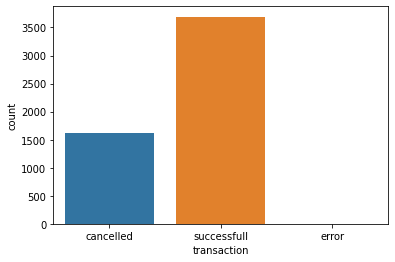

In [2]:
# 2. Проверьте, какие значения принимает колонка transaction.
# Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.
# Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

sns.countplot( data.transaction)

# без визуализации: data.transaction.value_counts()

In [3]:
# 3. Плохо видно число наблюдений у некоторых значений

In [3]:
# 5. Сколько произошло ошибок?

data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [4]:
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


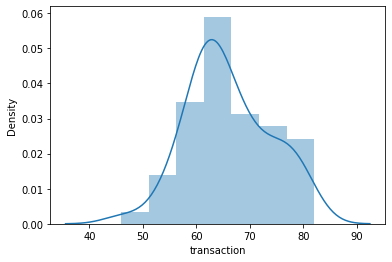

In [5]:
# 6. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
# Посмотрите на характеристики распределения,
# а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

user_transactions = data.query('transaction == "successfull"') \
    .groupby(['name'], as_index = False) \
    .agg({'transaction': 'count'})

sns.distplot(user_transactions.transaction)

In [6]:
user_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [7]:
# 7. К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:
# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.
# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.
# Новые данные сохранены в df.

path_updated = 'transaction_data_updated.csv'
df = pd.read_csv(path_updated, parse_dates = ['date'])
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [8]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


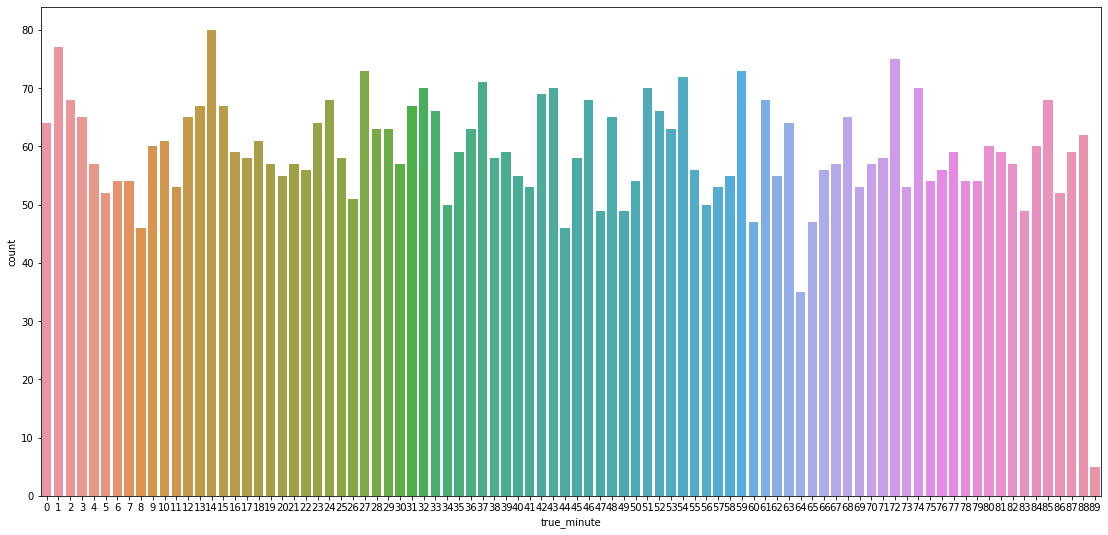

In [9]:
df = df.assign(true_minute = df.date.dt.minute + df.date.dt.hour * 60)
plt.figure(figsize=(19, 9))
sns.countplot(df.true_minute)

In [10]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [11]:
user_vs_true_minute_pivot = df.groupby(['name', 'true_minute'], as_index = False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='true_minute', columns='name', values='transaction') \
    .fillna(0)

In [12]:
user_vs_true_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
true_minute,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0
86,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
87,3.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


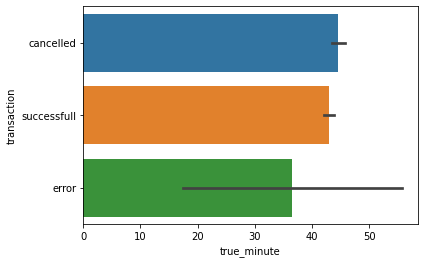

In [13]:
sns.barplot(x='true_minute', y='transaction', data=df)

In [10]:
# EXTRA HW
# В папке subsid (shared/homeworks/python_ds_miniprojects/5_subsid) находятся файлы (tm_sales_1, tm_sales_2, ...)
# с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля):
# FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.
# Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям,
# соединив файлы о продажах с логами по подключениям в системе.

#Особенности данных:

# сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
# поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
# продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
# если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается
# Сохраните результат в csv файл с разделителем ;, содержащий корректные подключения.

sales_1, sales_2, sales_3, logs = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_1.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_2.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/tm_sales_3.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/prod_activations_logs.csv'
df_1, df_2, df_3, data = pd.read_csv(sales_1, sep = ';'), pd.read_csv(sales_2, sep = ';'), pd.read_csv(sales_3, sep = ';'), pd.read_csv(logs, sep = ';')

df = pd.concat([df_1, df_2, df_3], ignore_index = True) \
    .rename(columns = lambda col: col.lower()) \
    .dropna()
df.subs_id = df.apply({'subs_id': lambda add_id: add_id if add_id.startswith('id') else 'id' + add_id})

data = data.rename(columns = lambda col: col.lower())

df = df.merge(data, how = 'inner', on = ['subs_id', 'prod_id'])
df.start_dttm = pd.to_datetime(df['start_dttm'], format='%d-%m-%Y %H:%M')
df.end_dttm = pd.to_datetime(df['end_dttm'], format='%d-%m-%Y %H:%M')
df['success'] = (df.end_dttm - df.start_dttm) > '5m'
df.loc[df['success'] == True] \
    .sort_values('subs_id') \
    .to_csv('success', sep=';')

In [5]:
df.dtypes

subs_id               object
filial_id              int64
prod_id                int64
act_dttm              object
start_dttm    datetime64[ns]
end_dttm      datetime64[ns]
success                 bool
dtype: object

In [7]:
df.subs_id.sort_values().values

array(['id2185490', 'id4651830', 'id5416547', 'id7642700', 'id7646509'],
      dtype=object)

In [11]:
df

,subs_id,filial_id,prod_id,act_dttm,start_dttm,end_dttm,success
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00,True
1,id7646509,5,6431,19-03-2020 13:00,2020-03-19 13:00:00,2020-03-19 13:03:00,False
2,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00,True
3,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00,True
4,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00,True
